Dimensionality:  3
Vectors:  10
Rank:  3
Pseudo Inverse: 
 [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
Esdtimatd Costs: 
 [ 1. 55. 18.]

Classification Report:
              precision    recall  f1-score   support

        POOR       0.67      1.00      0.80         2
        RICH       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Mean of 'Price Data': 1560.6634538152612
Variance of 'Price Data': 58732.36535253922
Sample Mean (Wednesdays): 1550.7060000000001
Sample Mean (April): 1698.9526315789474
Probability

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


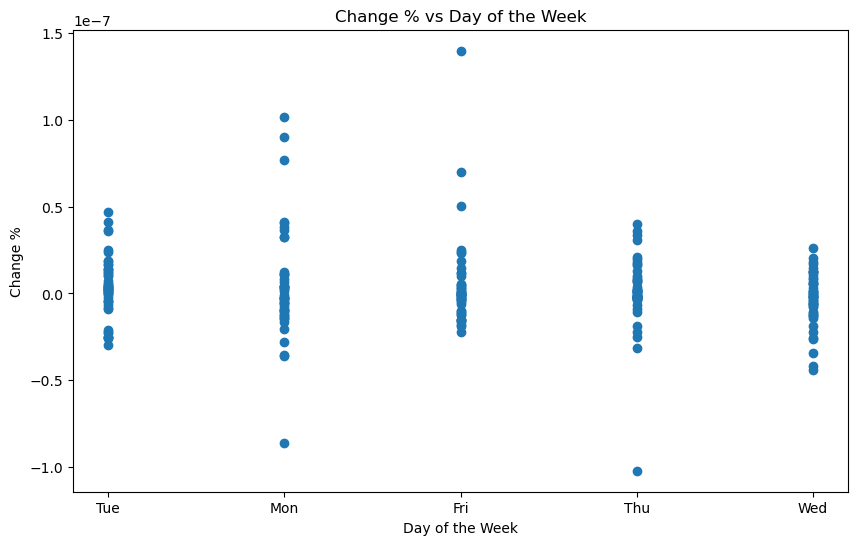

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

file_path = r"C:\Users\LENOVO T 470S\Downloads\Lab Session Data (1).xlsx"
sheet_name = 'Purchase data'
df = pd.read_excel(file_path, sheet_name=sheet_name)

#A1
A = df.iloc[:, 1:4].values
C = df.iloc[:, 4].values

def dimensionality(A):
    print("Dimensionality: ",A.shape[1])
    
def vectors(A):
    print("Vectors: ",A.shape[0])

def rank(A):
    rank = np.linalg.matrix_rank(A)
    print("Rank: ", rank)

def inv(A):
    pseudo = np.linalg.pinv(A)
    print("Pseudo Inverse: \n",pseudo)
    
dimensionality(A)
vectors(A)
rank(A)
inv(A)

#A2
def cost(A):
    pseudo = np.linalg.pinv(A)
    cost = np.dot(pseudo,C)
    print("Esdtimatd Costs: \n", cost)
    
cost(A)

#A3
def classify_customers(df):
    df['Class'] = np.where(df['Payment (Rs)'] > 200, 'RICH', 'POOR')

    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = df['Class'].values
   
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
   
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
   
    model = LogisticRegression()
    model.fit(X_train, y_train)
   
    y_pred = model.predict(X_test)
   
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
classify_customers(df)

#A4

sheet_name2 = 'IRCTC Stock Price'
df2 = pd.read_excel(file_path, sheet_name=sheet_name2)

price = df2.iloc[:, 3]

def population_mean(df2):
    mean = price.mean()
    variance = price.var()
    print(f"Mean of 'Price Data': {mean}")
    print(f"Variance of 'Price Data': {variance}")
    
def wed(df2):
    wed_data = df2[df2['Day'] == 'Wed']
    sample_mean = wed_data['Price'].mean()
    print(f"Sample Mean (Wednesdays): {sample_mean}")
    
def apr(df2):
    apr_data = df2[df2['Month'] == 'Apr']
    sample_mean = apr_data['Price'].mean()
    print(f"Sample Mean (April): {sample_mean}")
    
def loss(df2):
    if df2['Chg%'].dtype == 'object':
    # Convert 'Chg%' column to numeric values if it's a string
        df2['Chg%'] = df2['Chg%'].str.rstrip('%').astype(float) / 100
    else:
    # If 'Chg%' is already numeric, ensure it's in the correct format (if necessary)
        df2['Chg%'] = df2['Chg%'].astype(float) / 100
    total = len(df2)
    loss = df2['Chg%'].apply(lambda x: x < 0).sum()
    probability = loss/total
    print(f"Probability of making a loss: {probability:.2%}")
    
def wed_profit(df2):
    wed_data = df2[df2['Day'] == 'Wed']
    if df2['Chg%'].dtype == 'object':
        df2['Chg%'] = df2['Chg%'].str.rstrip('%').astype(float) / 100
    else:
        df2['Chg%'] = df2['Chg%'].astype(float) / 100
    total = len(wed_data)
    profit = wed_data['Chg%'].apply(lambda x: x > 0).sum()
    prob = profit/total
    print(f"Probability of making a profit on Wednesday: {prob:.2%}")
    
def condn_wed_profit(df2):
    wed_data = df2[df2['Day'] == 'Wed']
    if df2['Chg%'].dtype == 'object':
        df2['Chg%'] = df2['Chg%'].str.rstrip('%').astype(float) / 100
    else:
        df2['Chg%'] = df2['Chg%'].astype(float) / 100
    total = len(wed_data)
    profit = wed_data['Chg%'].apply(lambda x: x > 0).sum()
    prob = profit/total
    print(f"Conditional Probability of making a profit on Wednesday: {prob:.2%}")
    
def scatter(df2):
    if df2['Chg%'].dtype == 'object':
        df2['Chg%'] = df2['Chg%'].str.rstrip('%').astype(float) / 100
    plt.figure(figsize=(10, 6))
    plt.scatter(df2['Day'], df2['Chg%'])
    plt.xlabel('Day of the Week')
    plt.ylabel('Change %')
    plt.title('Change % vs Day of the Week')
    plt.show()
    
population_mean(df2)
wed(df2)
apr(df2)
loss(df2)
wed_profit(df2)
condn_wed_profit(df2)
scatter(df2)

#A5


sheet_name2="thyroid0387_UCI"
df=pd.read_excel(file_path, sheet_name=sheet_name2)
    

def find_datatypes(df):
    print(df.dtypes)

def find_categorical_attributes(df):
    categorical_attributes=df.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical columns:{categorical_attributes}")

def study_numeric_range(df):
    numeric_columns=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print(f"Numerical columns:{numeric_columns}")

def find_missing_values(df):
    missing_values=df.isnull().sum()
    print(f"{missing_values}")

def study_outliers(df):
    numeric_columns=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    for column in numeric_columns:
        mean=df[column].mean()
        std_dev=df[column].std()
        variance=df[column].var()
        print(f"Column:{column}")
        print(f"Mean:{mean}")
        print(f"Variance:{variance}")
        print(f"Standard deviation:{std_dev}")
        lower_bound=mean-3*std_dev
        upper_bound=mean+3*std_dev
        outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
        print(f"Potential outliers in {column}:\n{outliers[[column]]}\n")

find_datatypes(df)
find_categorical_attributes(df)
study_numeric_range(df)
find_missing_values(df)
study_outliers(df)

#A7

df.replace('?', np.nan, inplace=True)

numeric_c = df.select_dtypes(include = ['float64', 'int64']).columns
categorical_c = df.select_dtypes(include = ['object', 'category']).columns

def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out = ((series < lower_bound) | (series > upper_bound))
    return out.any()

def normalize_data(series):
    outliers = has_outliers(series)
    if outliers:
        scaler = MinMaxScaler()
        normalize_data = scaler.fit_transform(series.values.reshape(-1, 1))
        return normalize_data.flatten()
    else:
        return stats.zscore(series)

for col in numeric_c:
    df[col] = normalize_data(df[col])

print(df[numeric_c])

#A8

sheet_name3 = 'marketing_campaign'
df=pd.read_excel(file_path, sheet_name=sheet_name3)
df.replace('?', np.nan, inplace=True)
print("For marketing sheet")

binary_cols = [col for col in df.columns if set(df[col].dropna().unique()) <= {0, 1}]


df[binary_cols] = df[binary_cols]

v1 = df.loc[0, binary_cols].astype(int)
v2 = df.loc[1, binary_cols].astype(int)


f11 = np.sum((v1 == 1) & (v2 == 1))
f00 = np.sum((v1 == 0) & (v2 == 0))
f10 = np.sum((v1 == 1) & (v2 == 0))
f01 = np.sum((v1 == 0) & (v2 == 1))

jc = f11 / (f01 + f10 + f11)
smc = (f11 + f00) / (f00 + f01 + f10 + f11)

print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)

#A9

df1 = pd.read_excel(file_path, sheet_name='Purchase data')
df2 = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
df3 = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
df4 = pd.read_excel(file_path, sheet_name='marketing_campaign')

def preprocess_feature(df, feature_column):
    df[feature_column] = pd.to_numeric(df[feature_column], errors='coerce')
    df[feature_column] = df[feature_column].fillna(0)
    return df


def calculate_cosine_similarity(df):
    if len(df) < 2:
        print("Not enough data in the DataFrame.")
        return

    feature_column = df.columns[1]

    df = preprocess_feature(df, feature_column)

    v1 = df.iloc[0][feature_column]
    v2 = df.iloc[1][feature_column]

    print(f"Values being compared: {v1} (Document 1) vs {v2} (Document 2)")

    v1_vector = np.array([[v1]])
    v2_vector = np.array([[v2]])

    similarity = cosine_similarity(v1_vector, v2_vector)[0, 0]

    print(f"Cosine Similarity between the second features: {similarity}")

print("DataFrame 1:")
calculate_cosine_similarity(df1)
print("\nDataFrame 2:")
calculate_cosine_similarity(df2)
print("\nDataFrame 3:")
calculate_cosine_similarity(df3)
print("\nDataFrame 4:")
calculate_cosine_similarity(df4)



Calculating coefficients for DataFrame 1...


C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\L

Calculating coefficients for DataFrame 2...


C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\LENOVO T 470S\AppData\Local\Temp\ipykernel_5352\3750920887.py:23: RuntimeWarning: invalid value encountered in scalar divide
  smc = matches / len(vector1)
C:\Users\L

Calculating coefficients for DataFrame 3...
Calculating coefficients for DataFrame 4...


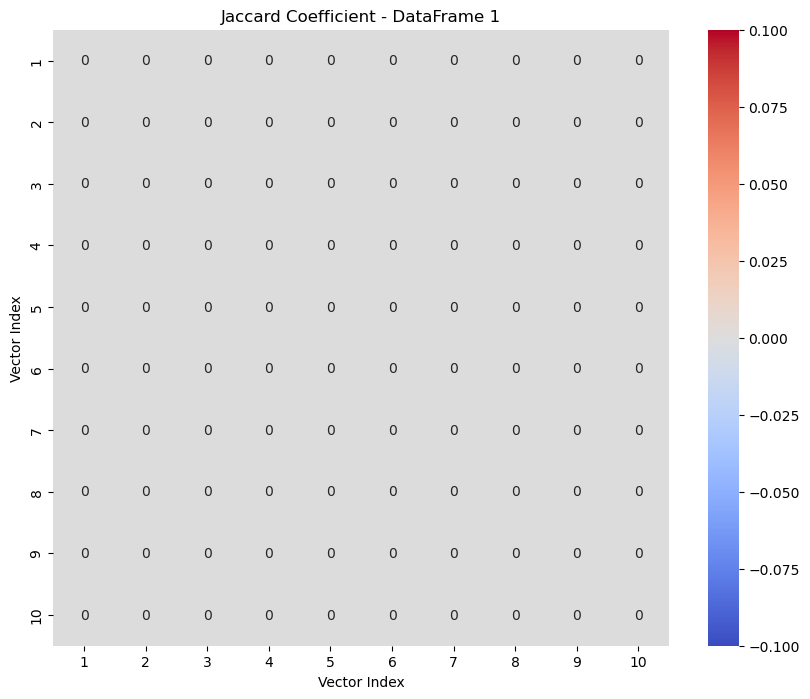

D:\Anaconda\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Anaconda\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


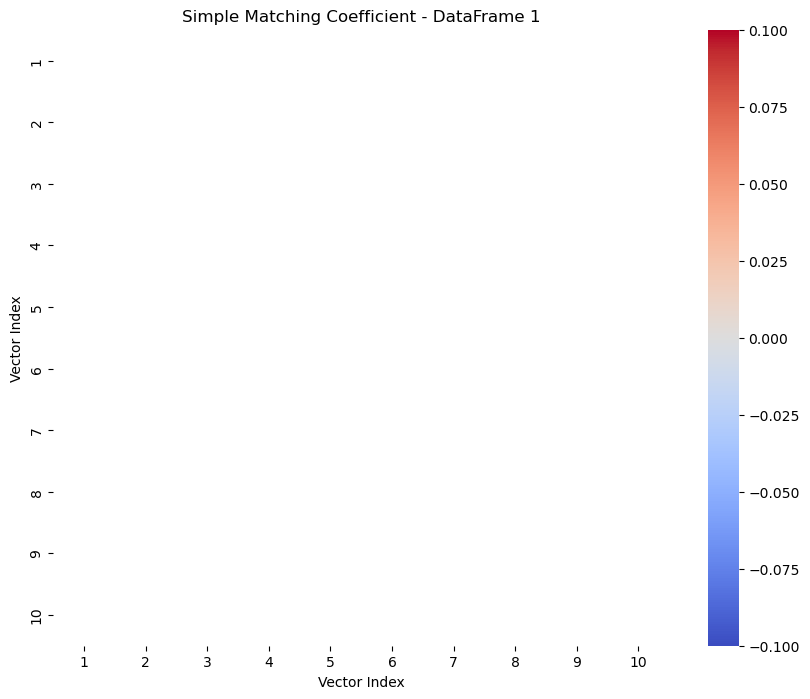

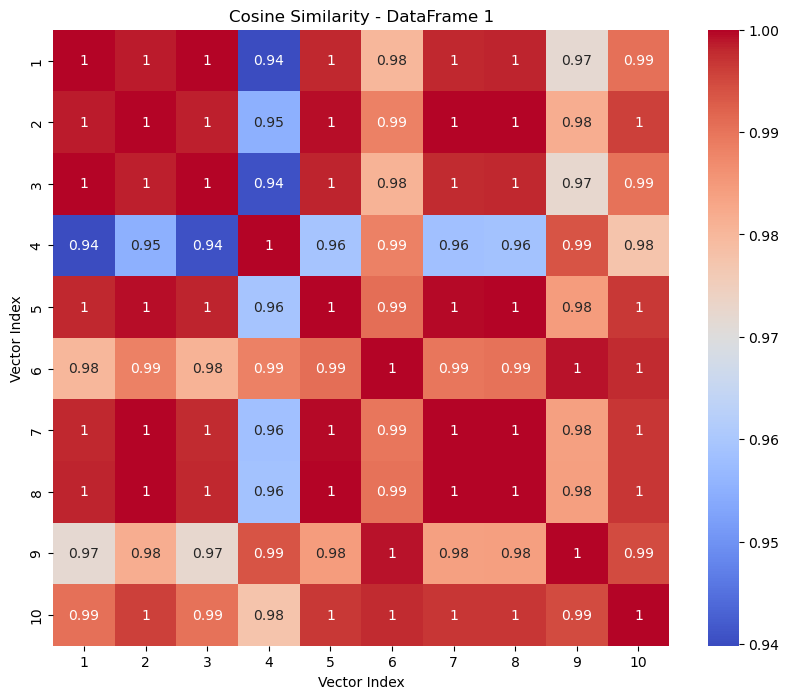

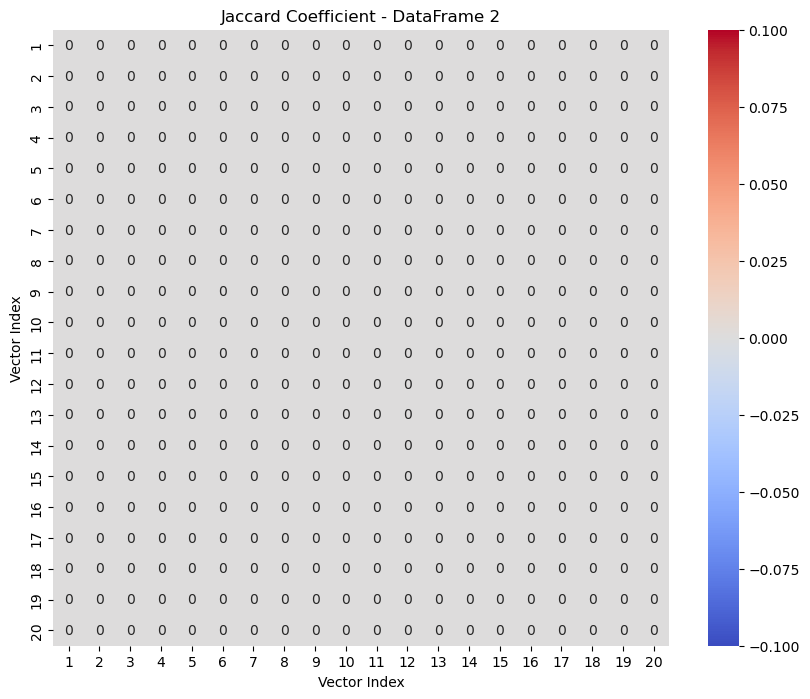

D:\Anaconda\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Anaconda\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


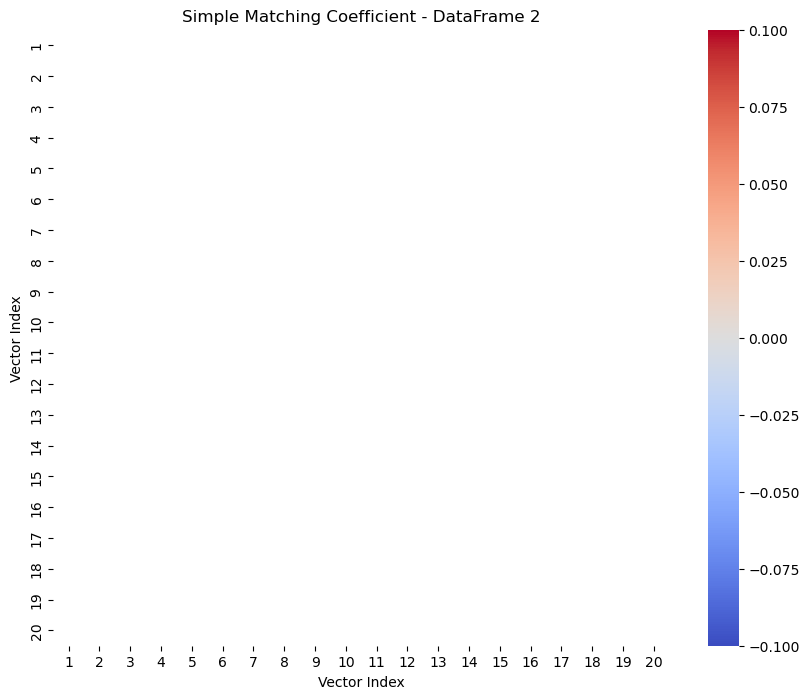

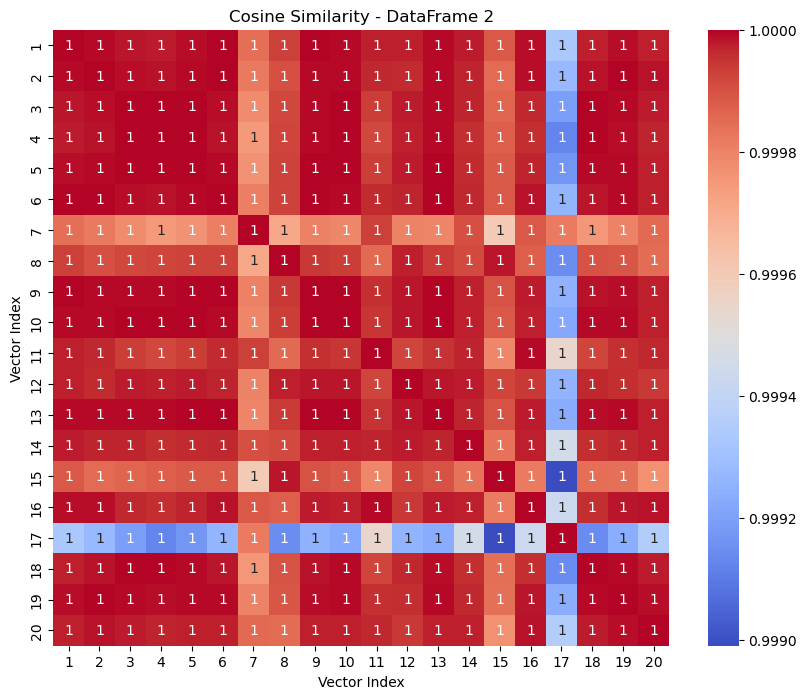

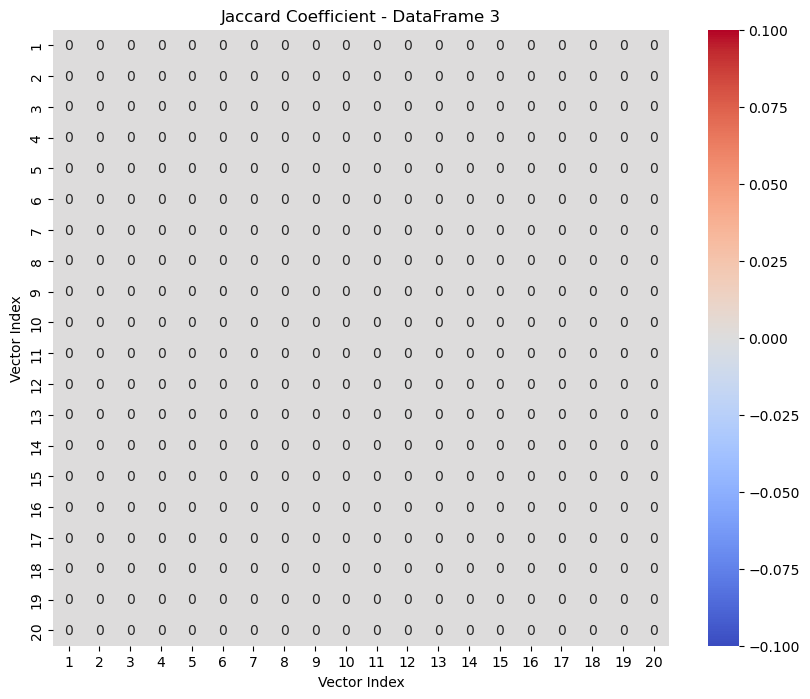

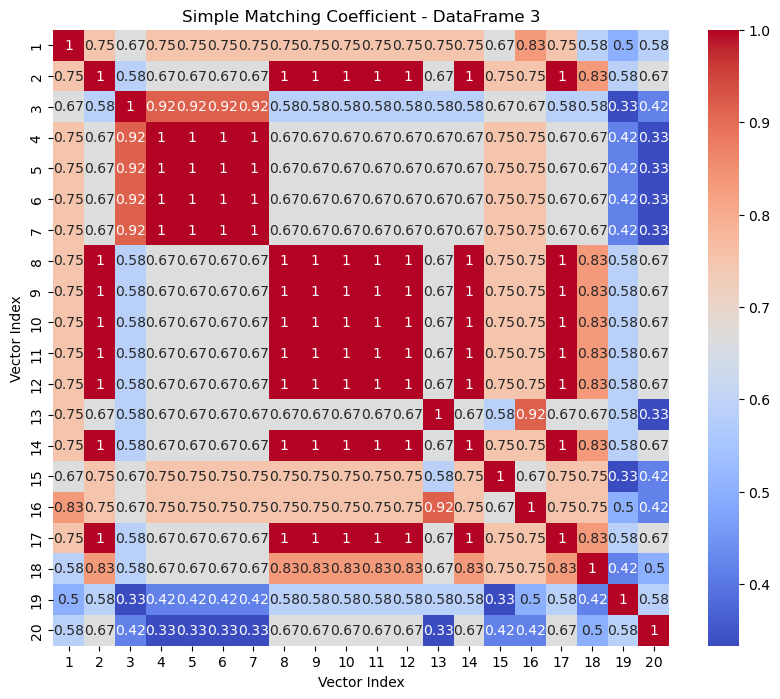

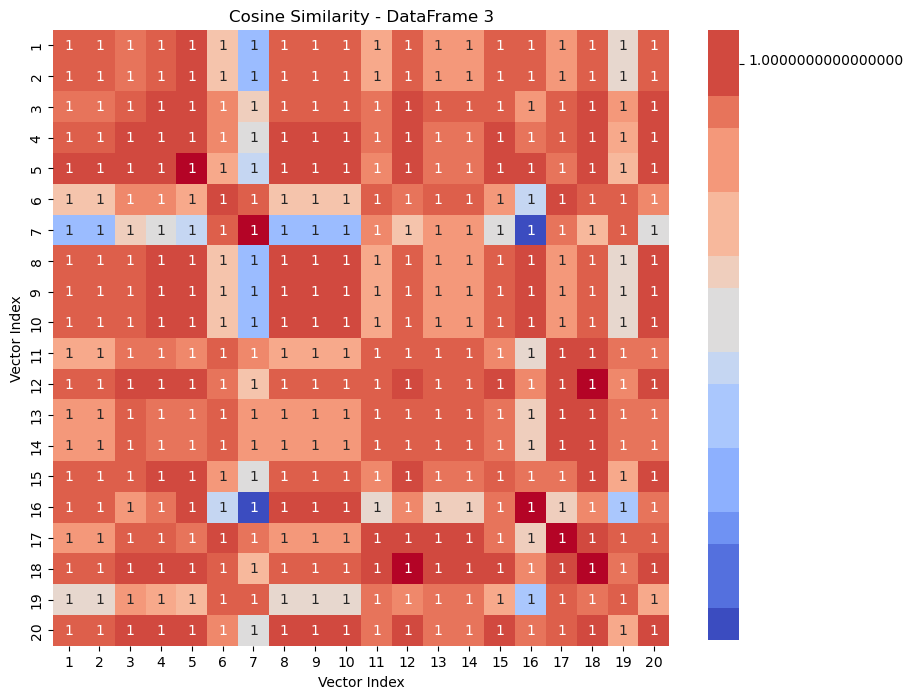

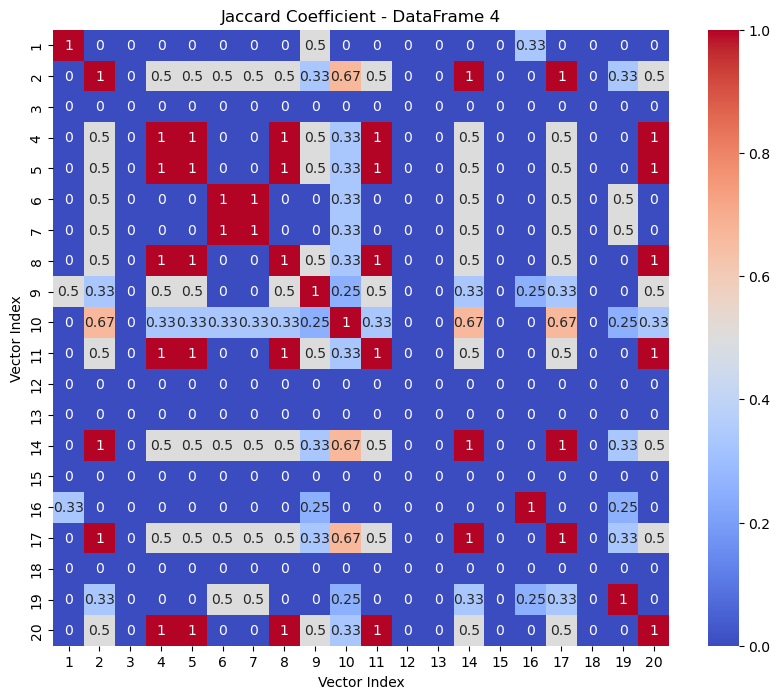

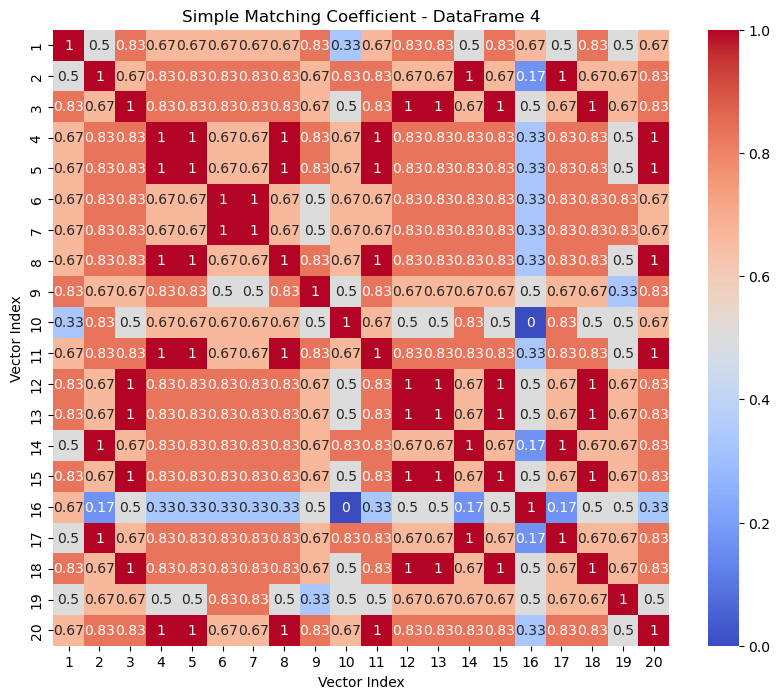

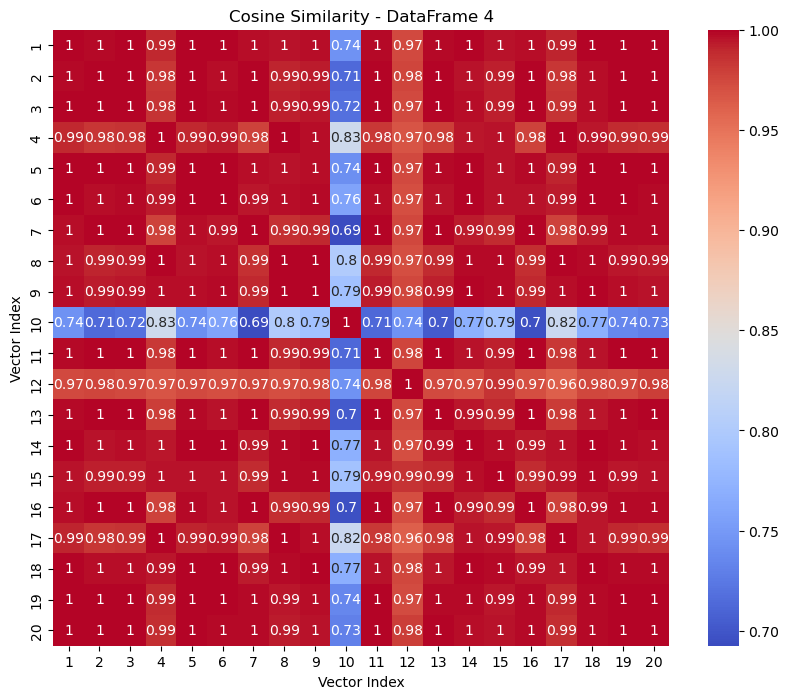

In [20]:
#A10
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

file_path = r"C:\Users\LENOVO T 470S\Downloads\Lab Session Data (1).xlsx"

# Load data
df1 = pd.read_excel(file_path, sheet_name='Purchase data').iloc[:20]
df2 = pd.read_excel(file_path, sheet_name='IRCTC Stock Price').iloc[:20]
df3 = pd.read_excel(file_path, sheet_name='thyroid0387_UCI').iloc[:20]
df4 = pd.read_excel(file_path, sheet_name='marketing_campaign').iloc[:20]

def jaccard_coefficient(vector1, vector2):
    intersection = np.sum((vector1 == 1) & (vector2 == 1))
    union = np.sum((vector1 == 1) | (vector2 == 1))
    jc = intersection / union if union != 0 else 0
    return jc

def simple_matching_coefficient(vector1, vector2):
    matches = (vector1 == vector2).sum()
    smc = matches / len(vector1)
    return smc

def calculate_cosine_similarity(v1, v2):
    similarity = cosine_similarity(v1.values.reshape(1, -1), v2.values.reshape(1, -1))[0, 0]
    return similarity

def compute_coefficients(df):
    # Handle NaN values by filling with the mean of only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    # Double-check for any remaining NaN values and fill with 0 (or another strategy)
    df[numeric_cols] = df[numeric_cols].fillna(0)
    
    num_vectors = len(df)
    jc_matrix = np.zeros((num_vectors, num_vectors))
    smc_matrix = np.zeros((num_vectors, num_vectors))
    cos_matrix = np.zeros((num_vectors, num_vectors))
    
    # Filter out non-numeric columns for cosine similarity
    numeric_df = df[numeric_cols]
    
    for i in range(num_vectors):
        for j in range(i, num_vectors):
            v1 = df.iloc[i]
            v2 = df.iloc[j]
            
            # Identify binary columns
            binary_cols = df.columns[df.apply(lambda col: col.nunique() == 2, axis=0)]
            v1_binary = v1[binary_cols]
            v2_binary = v2[binary_cols]
            
            # Calculate Jaccard Coefficient (only for binary columns)
            jc_matrix[i, j] = jaccard_coefficient(v1_binary, v2_binary)
            jc_matrix[j, i] = jc_matrix[i, j]  # Because JC is symmetric
            
            # Calculate Simple Matching Coefficient (only for binary columns)
            smc_matrix[i, j] = simple_matching_coefficient(v1_binary, v2_binary)
            smc_matrix[j, i] = smc_matrix[i, j]  # Because SMC is symmetric
            
            # Calculate Cosine Similarity (for numeric columns only)
            v1_numeric = numeric_df.iloc[i]
            v2_numeric = numeric_df.iloc[j]
            cos_matrix[i, j] = calculate_cosine_similarity(v1_numeric, v2_numeric)
            cos_matrix[j, i] = cos_matrix[i, j]  # Because Cosine Similarity is symmetric
    
    return jc_matrix, smc_matrix, cos_matrix

# Compute coefficients for each DataFrame
print("Calculating coefficients for DataFrame 1...")
jc1, smc1, cos1 = compute_coefficients(df1)
print("Calculating coefficients for DataFrame 2...")
jc2, smc2, cos2 = compute_coefficients(df2)
print("Calculating coefficients for DataFrame 3...")
jc3, smc3, cos3 = compute_coefficients(df3)
print("Calculating coefficients for DataFrame 4...")
jc4, smc4, cos4 = compute_coefficients(df4)

# Plotting Heatmaps
def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', square=True, 
                xticklabels=np.arange(1, len(matrix)+1), 
                yticklabels=np.arange(1, len(matrix)+1))
    plt.title(title)
    plt.xlabel('Vector Index')
    plt.ylabel('Vector Index')
    plt.show()

plot_heatmap(jc1, 'Jaccard Coefficient - DataFrame 1')
plot_heatmap(smc1, 'Simple Matching Coefficient - DataFrame 1')
plot_heatmap(cos1, 'Cosine Similarity - DataFrame 1')

plot_heatmap(jc2, 'Jaccard Coefficient - DataFrame 2')
plot_heatmap(smc2, 'Simple Matching Coefficient - DataFrame 2')
plot_heatmap(cos2, 'Cosine Similarity - DataFrame 2')

plot_heatmap(jc3, 'Jaccard Coefficient - DataFrame 3')
plot_heatmap(smc3, 'Simple Matching Coefficient - DataFrame 3')
plot_heatmap(cos3, 'Cosine Similarity - DataFrame 3')

plot_heatmap(jc4, 'Jaccard Coefficient - DataFrame 4')
plot_heatmap(smc4, 'Simple Matching Coefficient - DataFrame 4')
plot_heatmap(cos4, 'Cosine Similarity - DataFrame 4')
